In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mnist_train = pd.read_csv("mnist_train.csv")

In [8]:
print(mnist_train.shape)

(42000, 785)


In [9]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Cleaning and Normalization

In [11]:
mnist_train.isna().any().any()

False

#### Data Normalization

In [12]:
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

In [13]:
# Here is it 255 as we have 255 value range for pixels of an image. 
mnist_train_data = mnist_train_data/255.0

IMAGE LABEL: 4


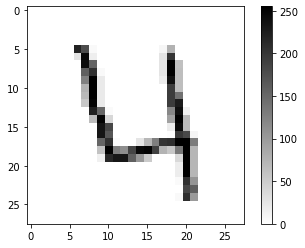

In [14]:
## Visulaize a single digit with an array

digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array) 

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

### PCA Implementation on MNIST Digits

**1) Using manual approach:**

In [15]:
# Compute standardization of data
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(mnist_train_data)
standardized_data.shape

(42000, 784)

In [16]:
# Calculate covariance matrix S(dxd)
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

In [17]:
# Calculate Eigen values and eigen vectors

from scipy.linalg import eigh

lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [18]:
vectors = vectors.T
print('vectors ',vectors.shape)

#Calculate unit vectors U1=V1 and new coordinates
new_coordinates = np.matmul(vectors, standardized_data.T)
print('new_coordinates',new_coordinates.shape)

new_coordinates = np.vstack((new_coordinates, mnist_train_label)).T

df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()

vectors  (2, 784)
(2, 42000)


,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


C:\Users\s_the_king\anaconda31\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


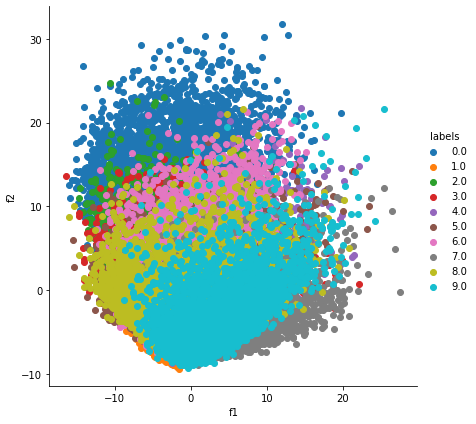

In [19]:
# Plot FacetGrid using seaborn¶
sns.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

### 2) Using Sci-kit Learn library

In [20]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(42000, 2)

In [21]:
pca_data = np.vstack((pca_data.T, mnist_train_label)).T
df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_PCA.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


C:\Users\s_the_king\anaconda31\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


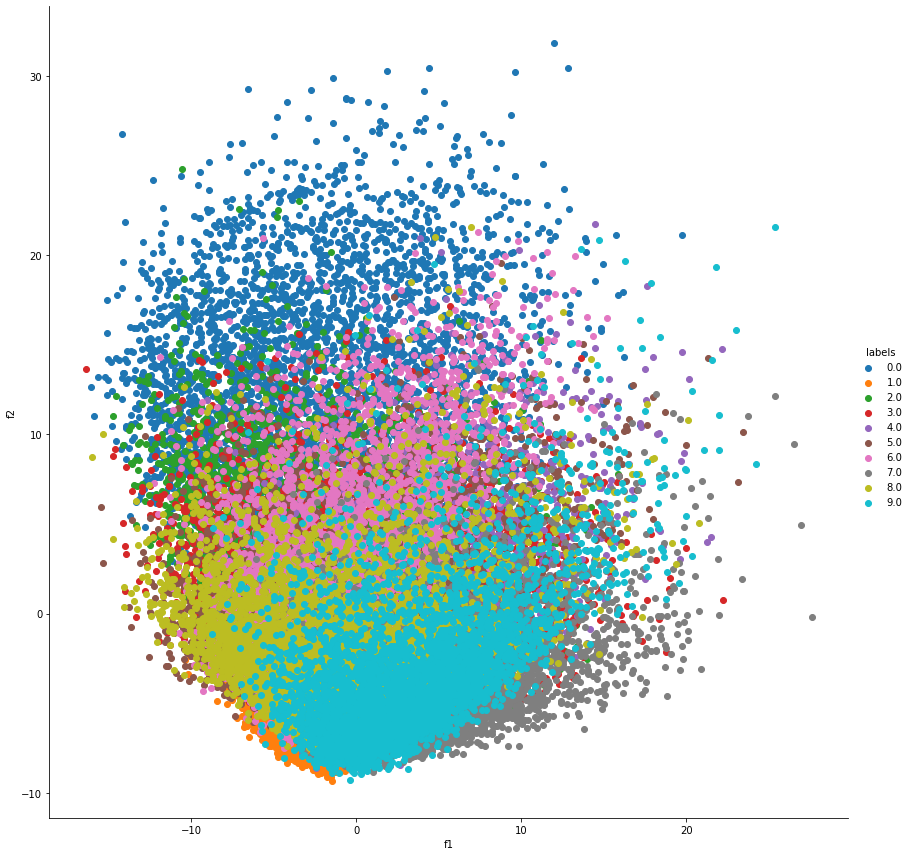

In [22]:
sns.FacetGrid(df_new, hue="labels", size=8).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

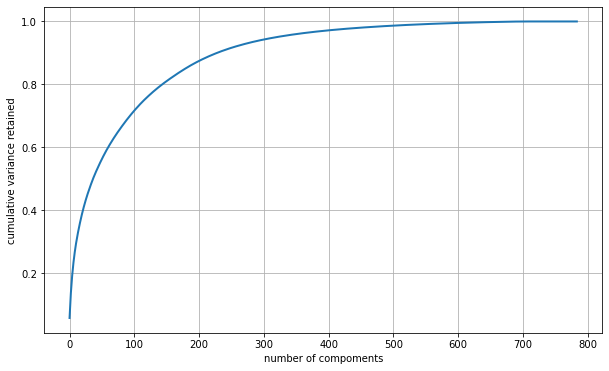

In [23]:
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_variance_retained = np.cumsum(percent_variance_retained)
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cum_variance_retained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("number of compoments")
plt.ylabel("cumulative variance retained")
plt.show()

### Decision Tree algorithm

In [25]:
mnist_train_data = df_PCA.loc[:, "f1":]
mnist_train_label = df_PCA.loc[:, "labels"]

In [28]:
df_PCA.shape

(42000, 3)

In [31]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(mnist_train_data[:33600], mnist_train_label[:33600])

In [33]:
prediction_clf = clf.predict(mnist_train_data[33601:])

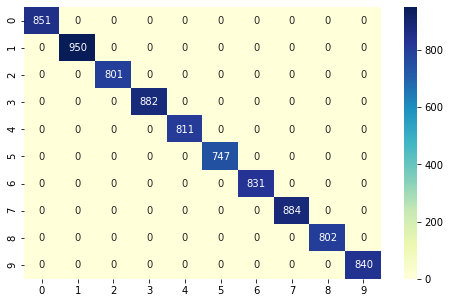

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(prediction_clf, mnist_train_label[33601:])

conf_matrix = pd.DataFrame(data = cm)

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Goal:

Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model. Unfortunately, while using PCA, you make your machine learning model less interpretable. Also, PCA will only be applied in your dataset when your dataset contains more than one numerical variable that you want to reduce its dimension.